## Taxi Fare prediction

In [49]:
import pandas as pd 
TRAIN_PATH = 'train.csv'

In [50]:
#take 10000 samples
df_sample = pd.read_csv(TRAIN_PATH, nrows=10000)

In [51]:
df_sample.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [52]:
#Drop key column
df_sample.drop(['key'], axis=1, inplace= True)
df_sample.count()

fare_amount          10000
pickup_datetime      10000
pickup_longitude     10000
pickup_latitude      10000
dropoff_longitude    10000
dropoff_latitude     10000
passenger_count      10000
dtype: int64

In [53]:
#creating extra columns to split year, month and date from pickup_datetime
df_sample['year'] = pd.DatetimeIndex(df_sample['pickup_datetime']).year
df_sample['month'] = pd.DatetimeIndex(df_sample['pickup_datetime']).month
df_sample['day'] = pd.DatetimeIndex(df_sample['pickup_datetime']).day
df_sample['weekday_number'] = pd.DatetimeIndex(df_sample['pickup_datetime']).dayofweek
df_sample['time_hours'] = pd.DatetimeIndex(df_sample['pickup_datetime']).hour

In [54]:
df_sample.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
day                    int64
weekday_number         int64
time_hours             int64
dtype: object

In [55]:
df_sample.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday_number,time_hours
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [56]:
#Add extra column for day of the week and convert them from pickup_datetime
df_sample['day_of_week'] = pd.to_datetime(df_sample['pickup_datetime']).dt.weekday_name
df_sample.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday_number,time_hours,day_of_week
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,Monday
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,Tuesday
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,Thursday
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,Saturday
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,Tuesday


In [57]:
df_sample.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
day                    int64
weekday_number         int64
time_hours             int64
day_of_week           object
dtype: object

In [58]:
#Function to create histograms
import matplotlib.pyplot as plt
def plot_chart(column):
    year_hist = df_sample[column].value_counts().sort_index(ascending=True).plot(kind = 'bar', width = 0.75, color= 'purple', figsize=(10,8))
    #print( df_sample[column].value_counts())
    plt.xlabel(column.title())
    plt.ylabel('Count')
    #x_years = df_sample['year'].sort_values().unique()
    #year_hist.set_xticklabels(labels=x_years, rotation=45, ha='right')
    for p in year_hist.patches:
        y_value = p.get_height()
        x_value = p.get_x() + p.get_width() / 2

        label = y_value
        year_hist.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, 10),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='top',                # Vertically center label
            ha='center')
    return None

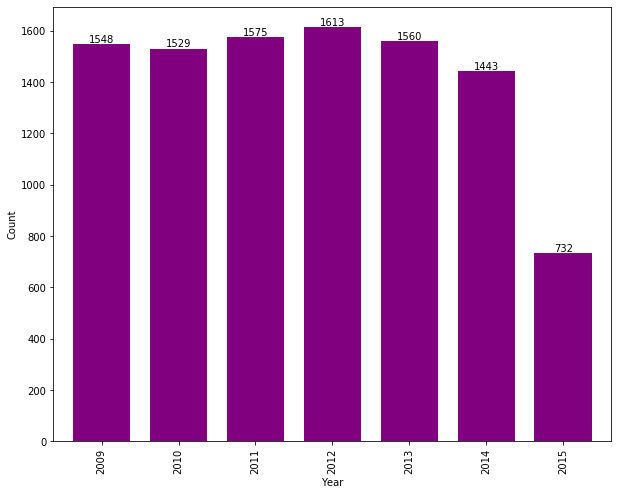

In [59]:
plot_chart('year')

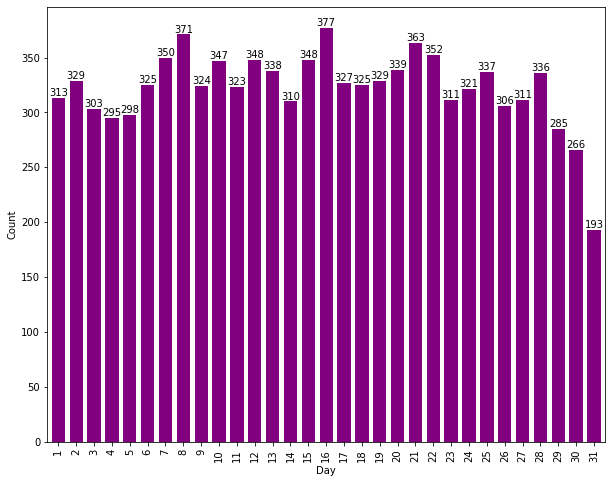

In [60]:
plot_chart('day')

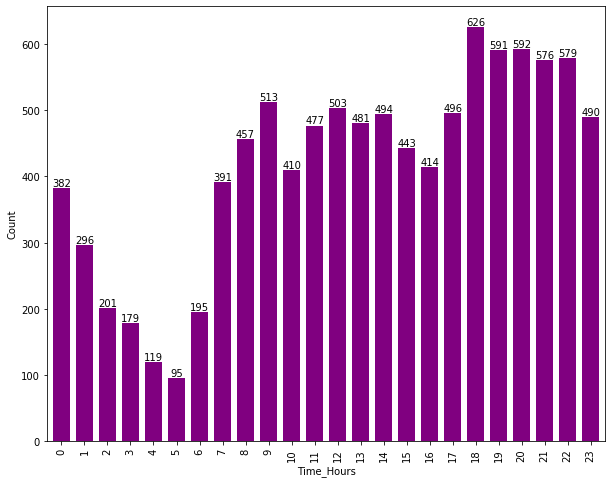

In [61]:
plot_chart('time_hours')

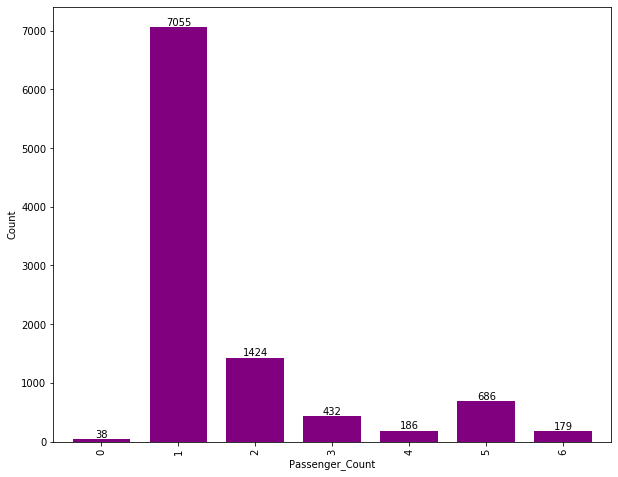

In [62]:
plot_chart('passenger_count')

In [63]:
import calendar
def plot_month_weekday(column, calendar_fn, label_name):
    
    data = df_sample[column].value_counts()
    data.sort_index(inplace=True)
    data.index = map(lambda x: calendar_fn[x], data.index)
    
    data_hist = data.plot(kind = 'bar', width = 0.75, color= 'purple', figsize=(10,8))
    #print( df_sample[column].value_counts())
    plt.xlabel(label_name)
    plt.ylabel('Count')
    #x_years = df_sample['year'].sort_values().unique()
    #year_hist.set_xticklabels(labels=x_years, rotation=45, ha='right')
    
    for p in data_hist.patches:
        y_value = p.get_height()
        x_value = p.get_x() + p.get_width() / 2

        label = y_value
        data_hist.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, 10),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='top',                # Vertically center label
            ha='center')  
    return None

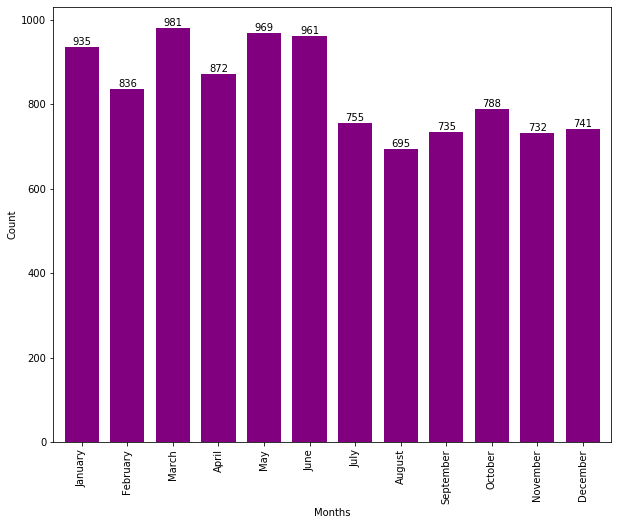

In [64]:
#Month hist
plot_month_weekday('month', calendar.month_name, 'Months')

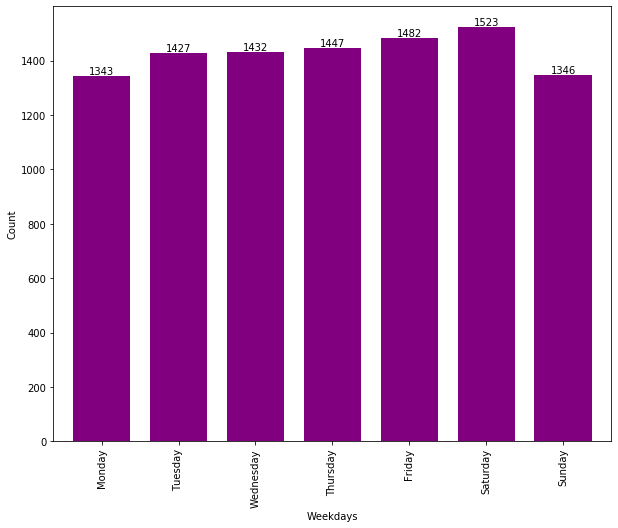

In [65]:
#Weekday histogram
plot_month_weekday('weekday_number', calendar.day_name, 'Weekdays')

In [66]:
#Print all sample where passenger count is 0
#df_sample.loc[lambda df:df['passenger_count']==0]

In [67]:
#Remove rows where passenger count is 0
df_sample.drop(df_sample.loc[lambda df:df['passenger_count']==0].index, inplace=True)
df_sample.count()

fare_amount          9962
pickup_datetime      9962
pickup_longitude     9962
pickup_latitude      9962
dropoff_longitude    9962
dropoff_latitude     9962
passenger_count      9962
year                 9962
month                9962
day                  9962
weekday_number       9962
time_hours           9962
day_of_week          9962
dtype: int64

In [68]:
#Print all sample where fare amount is negative
#df_sample.loc[lambda df:df['fare_amount']<0 ]

In [69]:
#Remove rows where fare_amount is smaller than 0
df_sample.drop(df_sample.loc[lambda df:df['fare_amount']<0].index, inplace=True)
df_sample.count()

fare_amount          9960
pickup_datetime      9960
pickup_longitude     9960
pickup_latitude      9960
dropoff_longitude    9960
dropoff_latitude     9960
passenger_count      9960
year                 9960
month                9960
day                  9960
weekday_number       9960
time_hours           9960
day_of_week          9960
dtype: int64

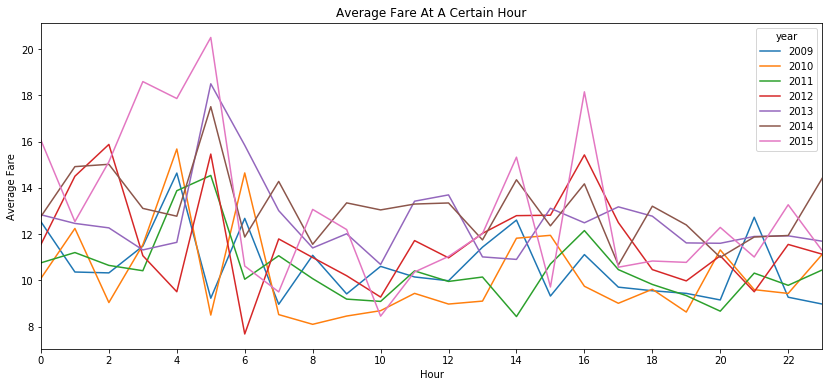

In [70]:
#What are the mean fares across a 24h totalled period for each year
import numpy as np 
df_sample.pivot_table('fare_amount', index='time_hours', columns='year').plot(figsize=(14,6))
plt.xlabel('Hour')
plt.ylabel('Average Fare')
plt.xticks(np.arange(0, 24, 2))
plt.title('Average Fare At A Certain Hour');
#fares rise each year, fares rise at 5am and 1500

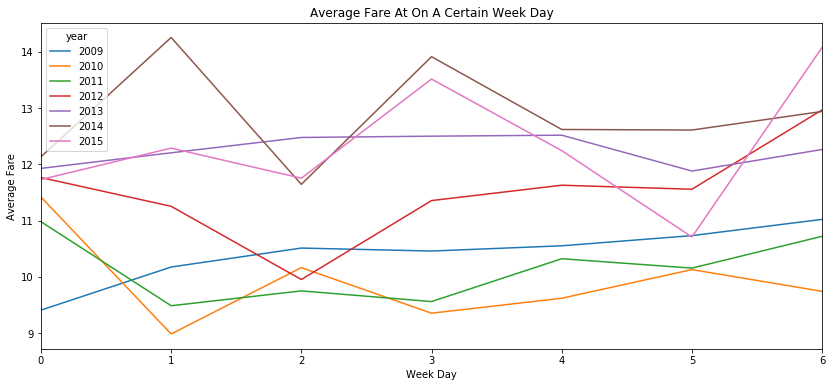

In [71]:
#What are the mean fares totalled across each weekday?
df_sample.pivot_table('fare_amount', index= 'weekday_number', columns='year').plot(figsize=(14,6))
plt.xlabel('Week Day')
plt.ylabel('Average Fare')
plt.title('Average Fare At On A Certain Week Day');
#fares go down on fridays?

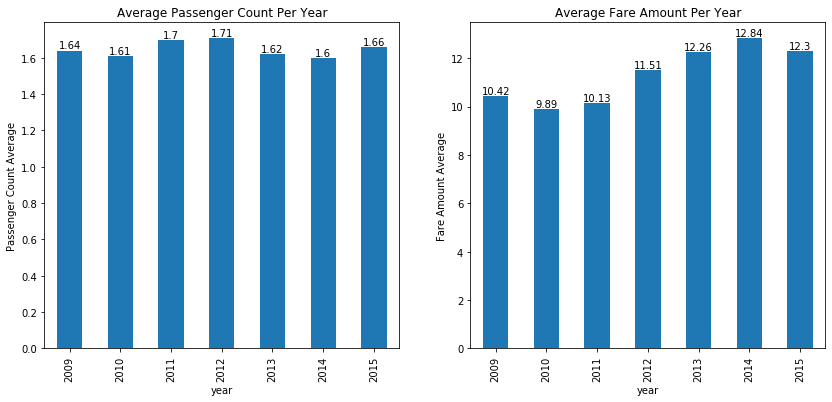

In [76]:
#How many people on average each year in each car and what the average fare?
groupedMean = df_sample.groupby('year')['passenger_count', 'fare_amount'].mean().round(2)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Passenger Count Average')
ax1.set_title('Average Passenger Count Per Year');
average_hist = groupedMean["passenger_count"].plot(kind='bar', ax=ax1)
for p in average_hist.patches:
    y_value = p.get_height()
    x_value = p.get_x() + p.get_width() / 2

    label = y_value
    average_hist.annotate(
    label,                      # Use `label` as label
    (x_value, y_value),         # Place label at end of the bar
    xytext=(0, 10),          # Horizontally shift label by `space`
    textcoords="offset points", # Interpret `xytext` as offset in points
    va='top',                # Vertically center label
    ha='center')
ax2.set_xlabel('Year')
ax2.set_ylabel('Fare Amount Average')
ax2.set_title('Average Fare Amount Per Year');
average_hist2 = groupedMean["fare_amount"].plot(kind='bar', ax=ax2)
for p in average_hist2.patches:
    y_value = p.get_height()
    x_value = p.get_x() + p.get_width() / 2

    label = y_value
    average_hist2.annotate(
    label,                      # Use `label` as label
    (x_value, y_value),         # Place label at end of the bar
    xytext=(0, 10),          # Horizontally shift label by `space`
    textcoords="offset points", # Interpret `xytext` as offset in points
    va='top',                # Vertically center label
    ha='center')
plt.show()
#average people per car stayed around the same, whilst average fare went up.